In [1]:
#shear_viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['0.2/', '0.5/', '1.0/', '2.0/', '5.0/']
from helper_fns import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, lambda0 = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*shear_viscosity)
    print 'output_folder = ', output_folder
    print 'shear_viscosity = ', shear_viscosity
    print 'r.shape = ', r.shape
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    everything += [(r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous)]

output_folder =  0.2/output
shear_viscosity =  2e-13
r.shape =  (1001, 2, 241)
viscous_timescale =  104166.666667
output_folder =  0.5/output
shear_viscosity =  5e-13
r.shape =  (1001, 2, 241)
viscous_timescale =  41666.6666667
output_folder =  1.0/output
shear_viscosity =  1e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  20833.3333333
output_folder =  2.0/output
shear_viscosity =  2e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  10416.6666667
output_folder =  5.0/output
shear_viscosity =  5e-12
r.shape =  (1001, 2, 241)
viscous_timescale =  4166.66666667


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np
import pandas as pd

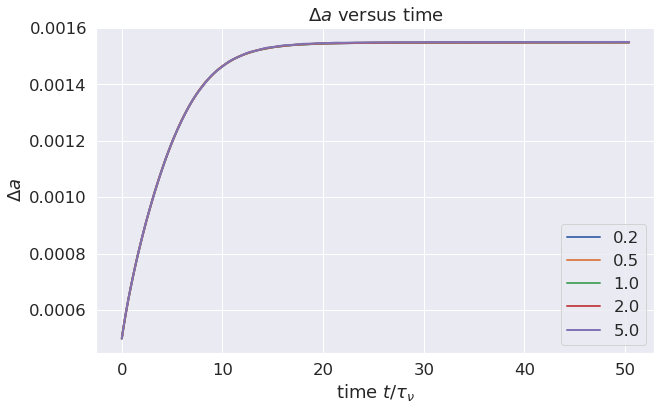

In [4]:
#plot delta_a versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    delta_a = a_outer - a_inner
    x = times_viscous
    y = delta_a
    linewidth = 2#2.5*(len(dirs)-idx)
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

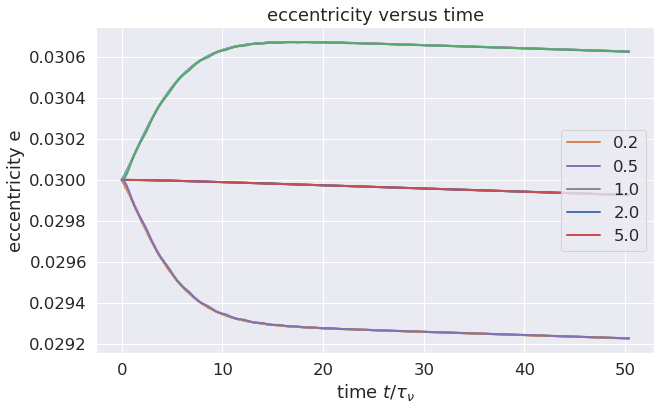

In [5]:
#plot eccentricity versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    linewidth = 2#2.5*(len(dirs)-idx)
    x = times_viscous
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=None)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=None)
p = ax.set_title('eccentricity versus time')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='center right')

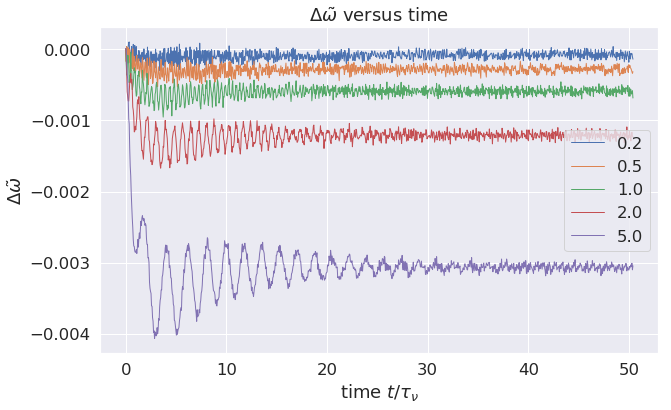

In [6]:
#plot delta_wt versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    delta_wt_list = []
    for t_idx in range(len(times)):
        s_idx = 0
        r0 = r[t_idx, s_idx]
        theta_idx = np.argmin(r0)
        wt_inner = wt[t_idx, s_idx, theta_idx]
        s_idx = 1
        r0 = r[t_idx, s_idx]
        theta_idx = np.argmin(r0)
        wt_outer = wt[t_idx, s_idx, theta_idx]
        delta_wt_list += [wt_outer - wt_inner]
    delta_wt = adjust_angle(np.array(delta_wt_list))
    x = times_viscous
    y = delta_wt
    p = ax.plot(x, y, linestyle='-', linewidth=1, label=dir[0:-1])
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = plt.legend(loc='center right')

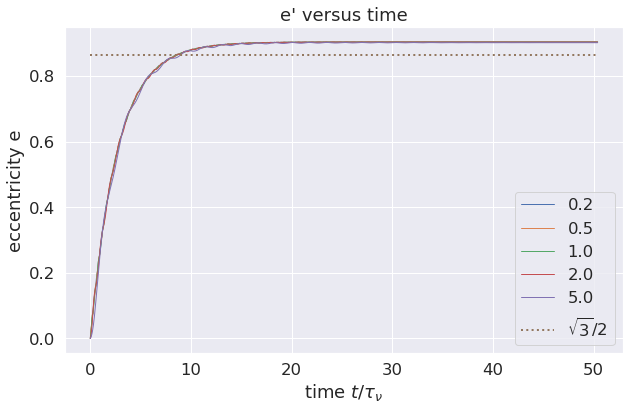

In [7]:
#plot e_prime versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    delta_e = e_outer - e_inner
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_avg = (a_outer + a_inner)/2
    delta_a = a_outer - a_inner
    e_prime = a_avg*delta_e/delta_a
    linewidth = 1#2.5*(len(dirs)-idx)
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=linewidth, label=dir[0:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title("e' versus time")
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='lower right')